In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import math as mh
import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.10.4


In [2]:
sx=10
sy=10
rd = 0.5      #deepth of texture
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 50
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                     )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)


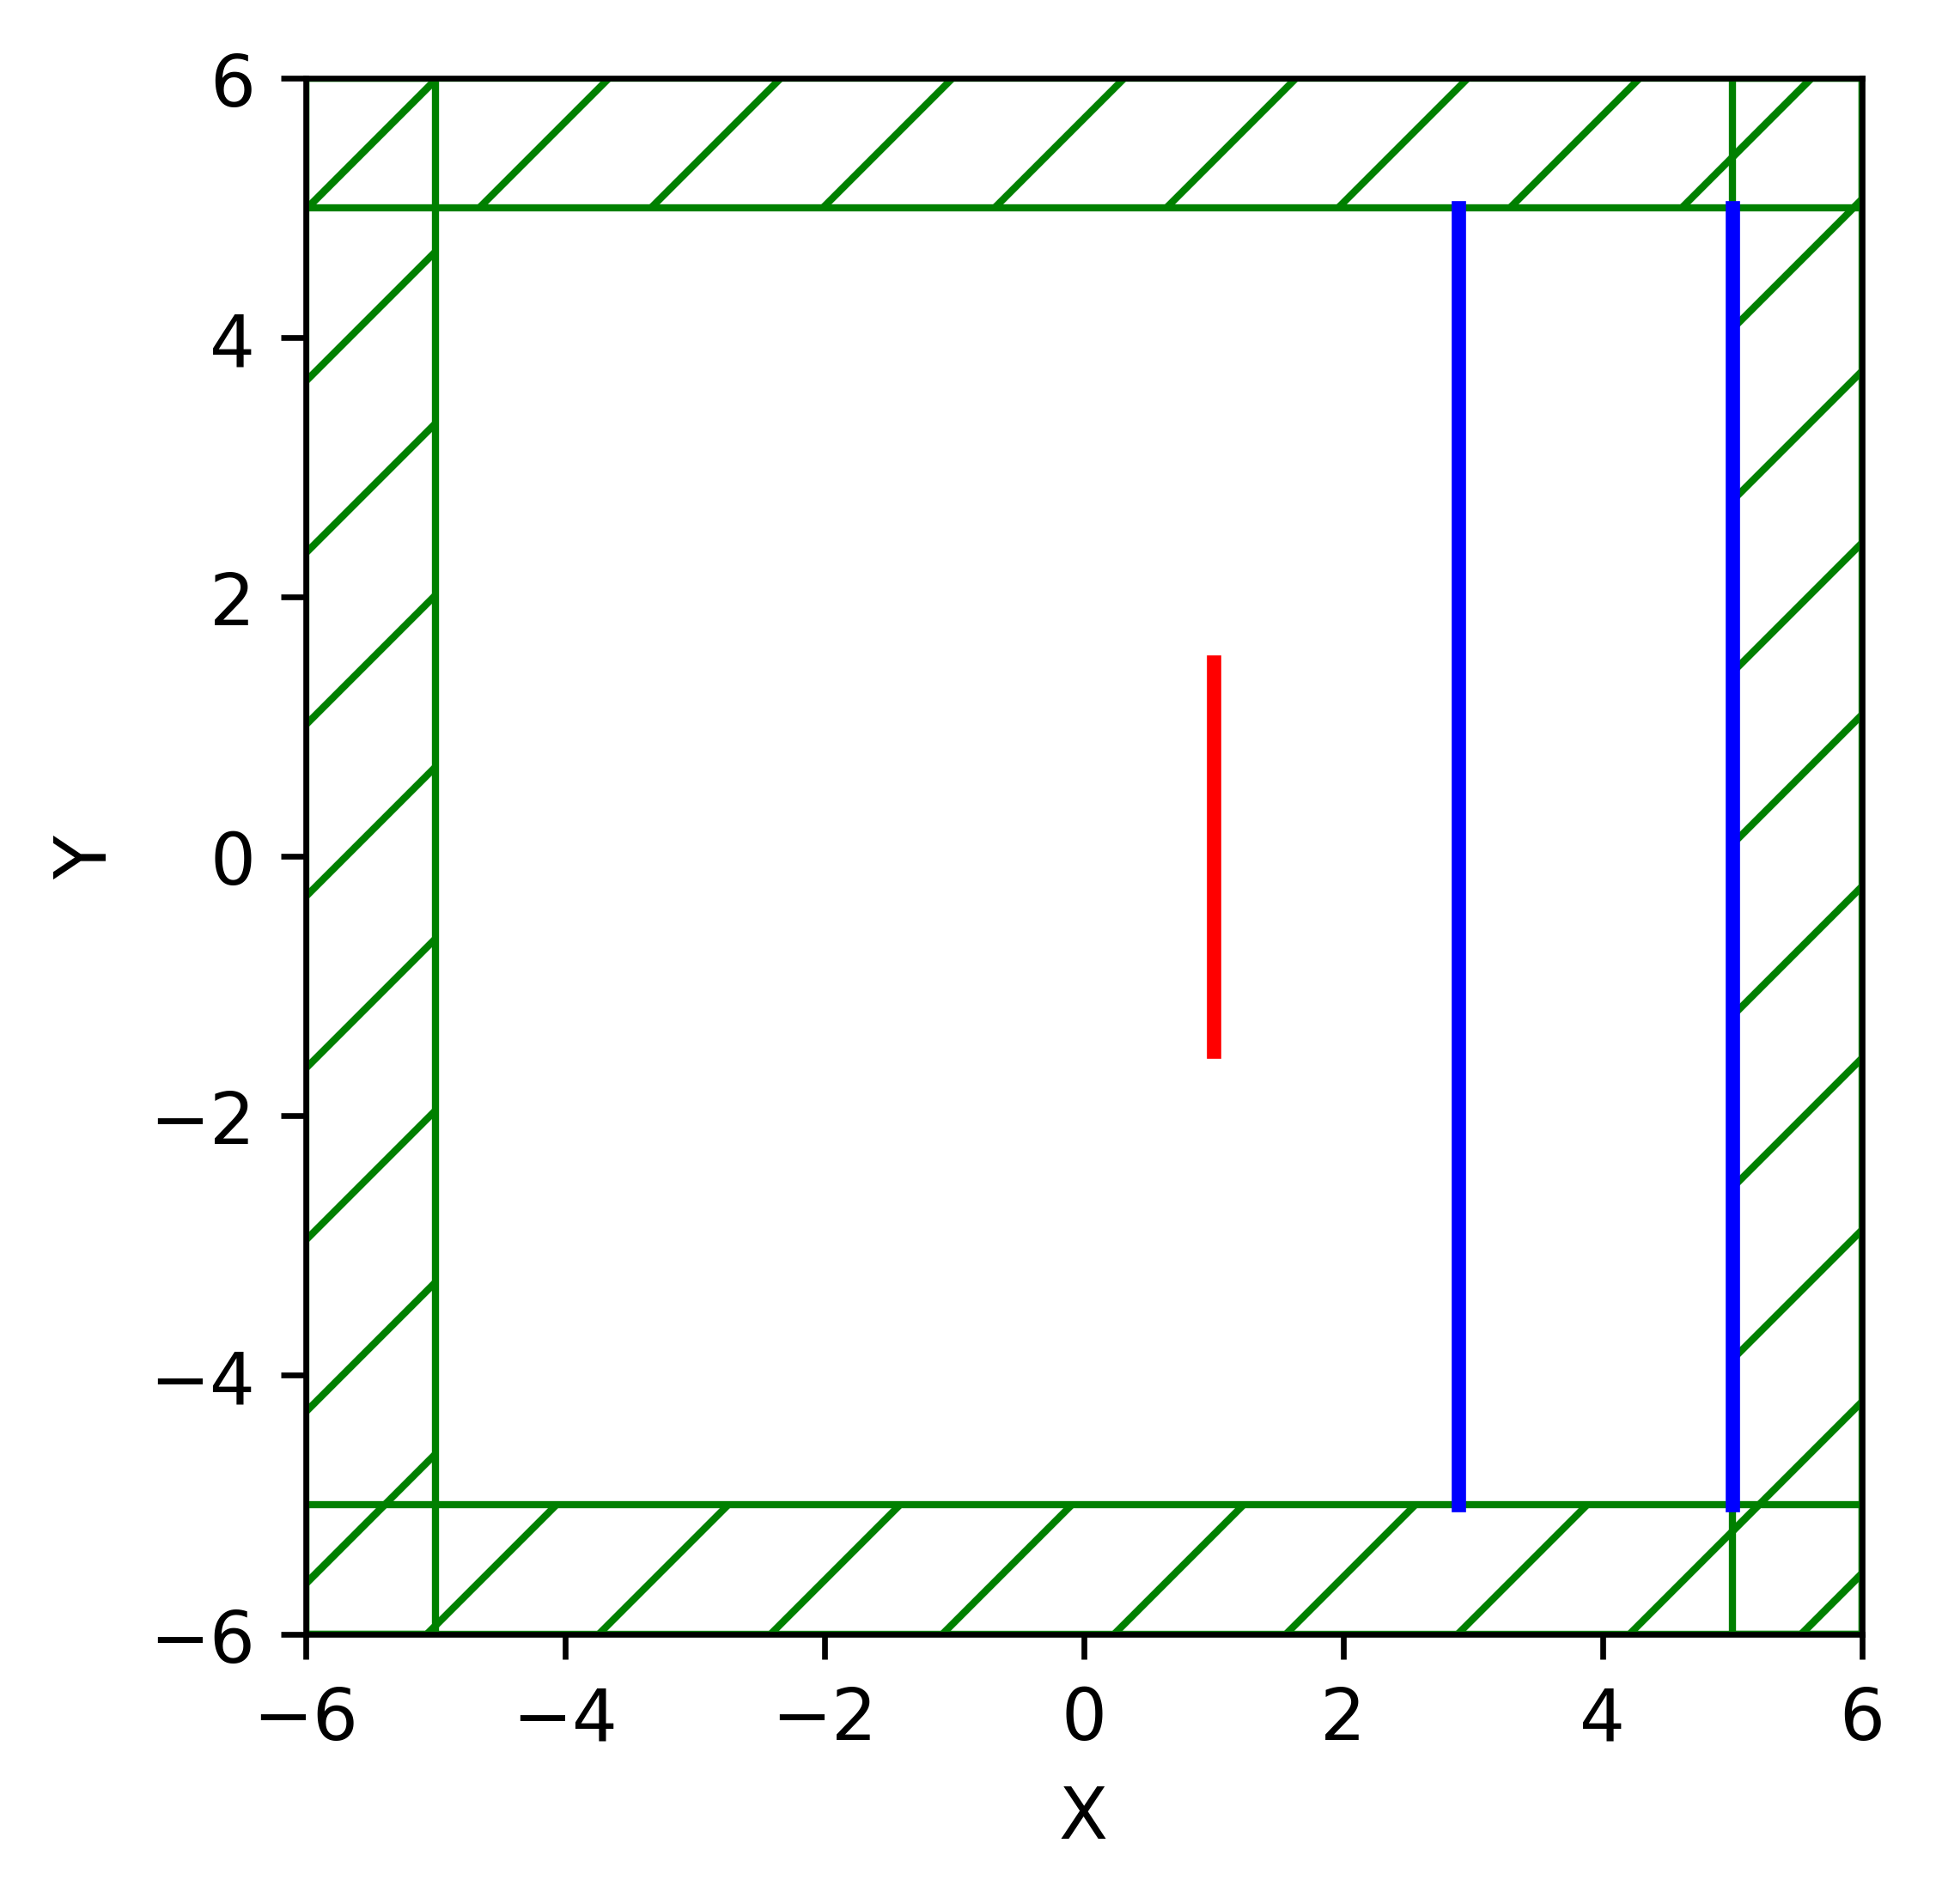

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                          )

refl_1 = sim.add_flux(
                      fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                      )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                      )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000558853 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.774414 s
-----------
creating output file "./eps-000000.00.h5"...
on time step 1205 (time=12.05), 0.0033209 s/step
on time step 2412 (time=24.12), 0.00331598 s/step
on time step 3543 (time=35.43), 0.00353744 s/step
on time step 4619 (time=46.19), 0.00371899 s/step
field decay(t = 50.01): 0.39441514008126954 / 0.39441514008126954 = 1.0
on time step 5330 (time=53.3), 0.00562705 s/step
on time step 6414 (time=64.14), 0.00369095 s/step
on time step 7345 (time=73.45), 0.0043041 s/step
on time step 8344 (time=83.44), 0.00400828 s/step
on time step 9439 (time=94.39), 0.0036538 s/step
field decay(t = 100.01): 6.323761485647929e-14 / 0.39441514008126954 = 1

In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

array([2.76054817e-06, 2.88028942e-06, 3.00486953e-06, 3.13460256e-06,
       3.26967552e-06, 3.41020291e-06, 3.55632439e-06, 3.70827487e-06,
       3.86638708e-06, 4.03103669e-06, 4.20257459e-06, 4.38128944e-06,
       4.56741487e-06, 4.76116420e-06, 4.96276398e-06, 5.17246948e-06,
       5.39056566e-06, 5.61736678e-06, 5.85322067e-06, 6.09850845e-06,
       6.35362592e-06, 6.61894567e-06, 6.89478120e-06, 7.18138515e-06,
       7.47899901e-06, 7.78793699e-06, 8.10865544e-06, 8.44175749e-06,
       8.78791765e-06, 9.14776315e-06, 9.52178259e-06, 9.91032233e-06,
       1.03136790e-05, 1.07322356e-05, 1.11665589e-05, 1.16173988e-05,
       1.20855929e-05, 1.25719372e-05, 1.30771050e-05, 1.36016586e-05,
       1.41461355e-05, 1.47111467e-05, 1.52974193e-05, 1.59057653e-05,
       1.65370108e-05, 1.71919461e-05, 1.78713381e-05, 1.85759920e-05,
       1.93068125e-05, 2.00648089e-05, 2.08510340e-05, 2.16664962e-05,
       2.25121096e-05, 2.33887228e-05, 2.42972130e-05, 2.52385842e-05,
      

-----------
Initializing structure...
time for choose_chunkdivision = 0.00215602 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 50
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cone, center = (3.15,4.675,0)
          radius 0, height 0.5, axis (-1, 0, 0)
          radius2 0.1875
          dielectric constant epsilon diagonal = (1,1,1)
     cone, center = (3.15,4.05,0)
          radius 0, height 0.5, axis (-1, 0, 0)
          radius2 0.1875
          dielectric constant epsilon diagonal = (1,1,1)
     cone, center = (3.15,3.425,0)
          radius 0, height 0.5, axis (-1, 0, 0)
          radius2 0.1875
          dielectric constant epsilon diagonal = (1,1,1)
     cone, center = (3.15,2.8

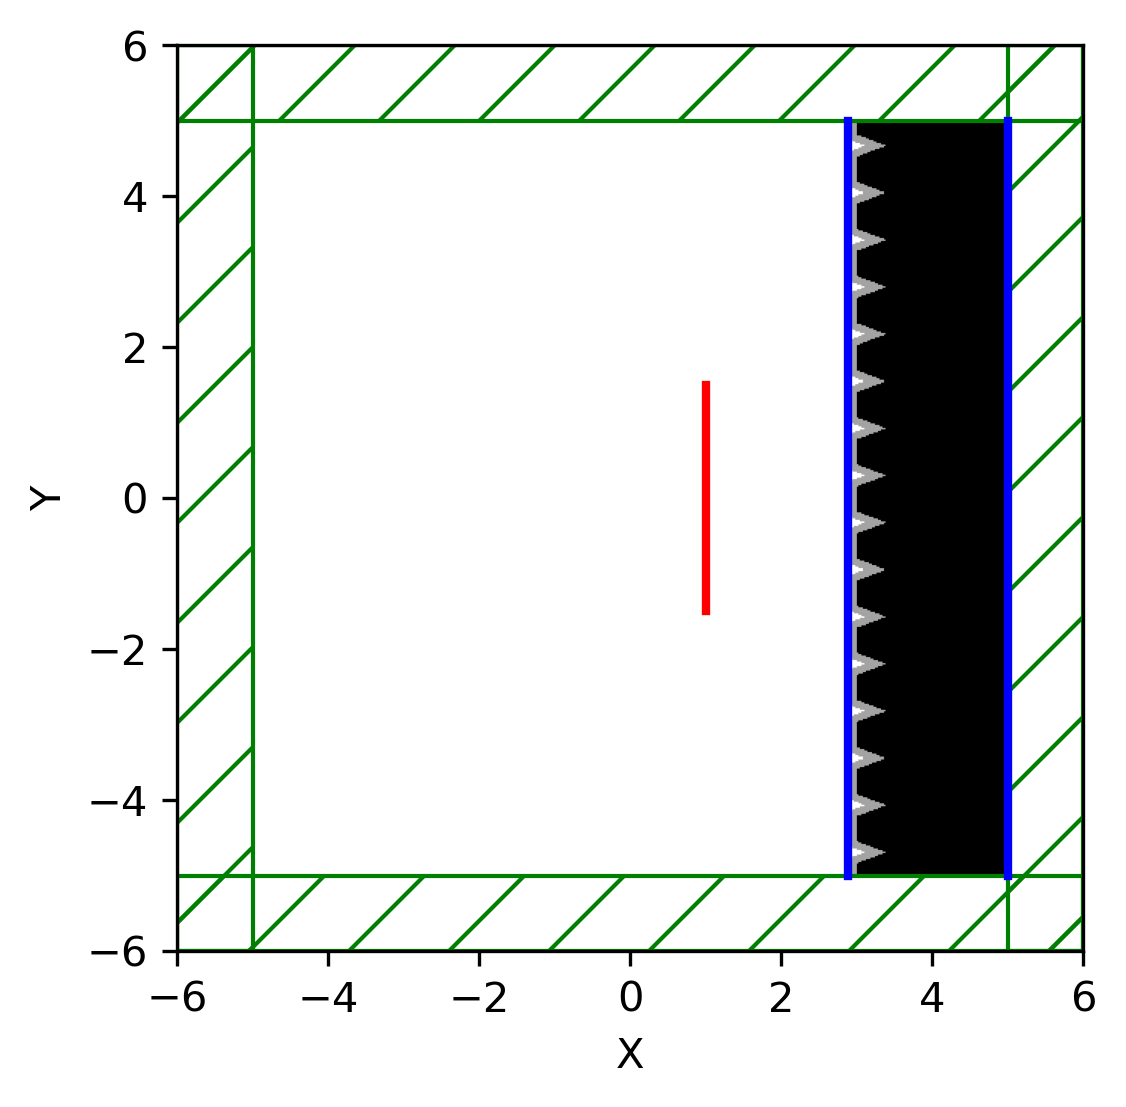

In [8]:
sim.reset_meep()

#from mpmath import *


# Design texture
size_x = 0.4
size_y = 0.3
N = 15
D = (sy)/(N+1)


geometry = [mp.Block(
                    size = mp.Vector3(T_Si, sy, mp.inf), 
                    center = mp.Vector3(0.5*sx-0.5*(T_Si), 0),
                    material = cSi
                     ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4
                     )
           ]
'''
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Cone(
                            radius = 0,
                            radius2 = 0.5*size_y*((size_x+T_Arc)/size_x),
                            height = size_x+T_Arc,
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc)+0.5*(size_x+T_Arc), 
                                                -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            axis = mp.Vector3(-1,0,0)
                            
                           )
                            )
'''      
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Cone(
                            radius = 0,
                            radius2 = 0.5*size_y*((size_x+T_Arc)/size_x),
                            height = size_x+T_Arc,
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc)+0.5*(size_x+T_Arc), 
                                                -0.5*sy+size_y+D*i), 
                            material = Si3N4,
                            axis = mp.Vector3(-1,0,0)
                            
                           )
                            )
        
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Cone(
                            radius = 0,
                            radius2 = 0.5*size_y*((size_x+T_Arc)/size_x),
                            height = size_x+T_Arc,
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc)+0.5*(size_x+T_Arc)-(1*T_Arc)/(mh.sin(mh.atan((0.5*size_y)/size_x))), 
                                                -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            axis = mp.Vector3(-1,0,0)
                            
                           )
                            )
        
'''          
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Cone(
                            radius = 0,
                            radius2 = size_y,
                            height = size_x,
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc-0.5*size_x), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            axis = mp.Vector3(-1,0,0)
                            
                           )
                            )        
'''
geometry.append( 
            mp.Block(
                    size = mp.Vector3(2*T_Arc, sy, mp.inf),
                    center = (0.5*sx-(T_Si+T_Arc)-T_Arc, 0), 
                      material = mp.Medium(epsilon=eps_air),
                     )
                ) 
        
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                    )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                      )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=300)
sim.plot2D()
plt.show()


In [9]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000.00.h5"...


/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1343: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/Users/yu-chengchiou/opt/anaconda3/envs/mp/lib/python3.10/site-packages/meep/simulation.py:1347: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 259 (time=2.59), 0.0154934 s/step
on time step 582 (time=5.82), 0.0124065 s/step
on time step 1027 (time=10.27), 0.00899647 s/step
on time step 1273 (time=12.73), 0.016288 s/step
on time step 1506 (time=15.06), 0.0173556 s/step
on time step 1921 (time=19.21), 0.00964577 s/step
field decay(t = 20.01): 0.0009692752359469709 / 0.0009692752359469709 = 1.0
on time step 2244 (time=22.44), 0.0123965 s/step
on time step 2523 (time=25.23), 0.0146115 s/step
on time step 2859 (time=28.59), 0.0119088 s/step
on time step 3126 (time=31.26), 0.0150089 s/step
on time step 3535 (time=35.35), 0.00978746 s/step
on time step 3945 (time=39.45), 0.00977158 s/step
field decay(t = 40.02): 0.00023874318622844846 / 0.0009692752359469709 = 0.24631103465178195
on time step 4392 (time=43.92), 0.00896251 s/step
on time step 4846 (time=48.46), 0.00883953 s/step
on time step 5241 (time=52.41), 0.0101503 s/step
on time step 5661 (time=56.61), 0.00954635 s/step
field decay(t = 60.03): 8.945597988708931e-06

In [10]:
#no_ARC_refl_data

In [11]:
#no_ARC_refl_flux

In [12]:
#with_ARC_refl_flux

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('wege_with_ARC.csv')

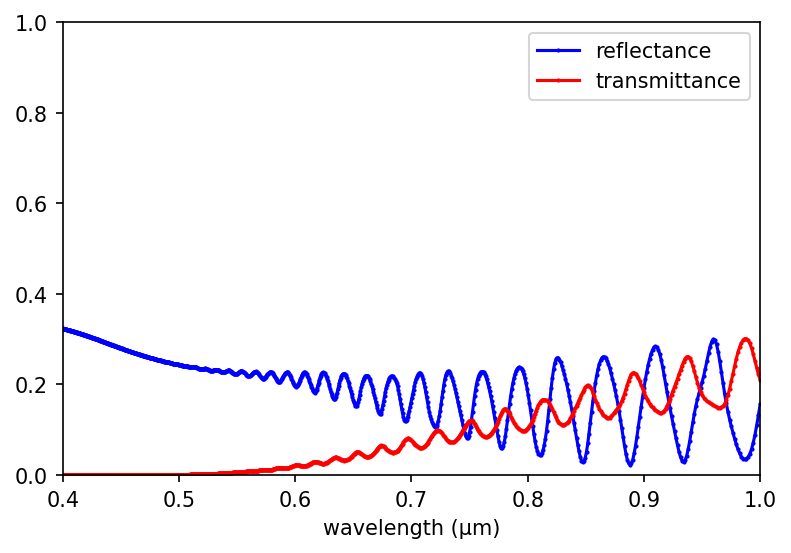

In [14]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption', markersize = 1)
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()